In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
!pip install gdown

# to upgrade
!pip install --upgrade gdown

In [3]:
import gdown
url = "https://docs.google.com/spreadsheets/d/1W9YDxcKjv3jlNYSSqv52nVjhVXcGPJuucpEjSkWfujE/edit?usp=sharing"
output = "Dataskripsi_asli"
gdown.download(url, output)

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1W9YDxcKjv3jlNYSSqv52nVjhVXcGPJuucpEjSkWfujE
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1W9YDxcKjv3jlNYSSqv52nVjhVXcGPJuucpEjSkWfujE/edit?usp=sharing
To: /content/Dataskripsi_asli
340kB [00:00, 3.27MB/s]


'Dataskripsi_asli'

In [4]:

# Update the URL to the correct download link
# You can get this by going to File -> Share -> Get link -> Change "Anyone with the link can edit" to "Anyone with the link can view" -> then clicking "Copy link"
url = "https://docs.google.com/spreadsheets/d/1W9YDxcKjv3jlNYSSqv52nVjhVXcGPJuucpEjSkWfujE/export?format=xlsx"
output = "Dataskripsi_asli.xlsx"  # Add the .xlsx extension
gdown.download(url, output)

dataset = pd.read_excel('/content/Dataskripsi_asli.xlsx', engine='openpyxl')  # Specify the engine
dataset.head()

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1W9YDxcKjv3jlNYSSqv52nVjhVXcGPJuucpEjSkWfujE/export?format=xlsx
To: /content/Dataskripsi_asli.xlsx
32.8kB [00:00, 5.59MB/s]


,Provinsi,Kabupaten,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan
0,Aceh,Simeulue,55.22,0.3162,0.0401,0.9518,1.0,1.0,0.2976,0.2595
1,Aceh,Aceh Singkil,66.77,1.0000,0.0791,0.8167,1.0,1.0,0.4060,0.3721
2,Aceh,Aceh Selatan,50.96,0.2738,0.3094,0.4060,1.0,1.0,0.3124,0.2654
3,Aceh,Aceh Tenggara,62.67,1.0000,0.0129,1.0000,1.0,1.0,0.1440,0.2303
4,Aceh,Aceh Timur,45.29,0.0173,0.0216,0.9270,1.0,1.0,0.1626,0.0416


In [5]:
dataset.describe()

,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,60.498074,0.474710,0.189351,0.842347,0.920376,0.976044,0.479682,0.352365
std,13.565406,0.376851,0.297226,0.281135,0.212491,0.124965,0.225532,0.266877
min,15.680000,0.000000,0.001000,0.000000,0.028400,0.071600,0.016900,0.005300
25%,51.657500,0.127850,0.029825,0.780225,1.000000,1.000000,0.300525,0.152500
50%,59.455000,0.359000,0.053900,1.000000,1.000000,1.000000,0.447350,0.281350
75%,69.085000,0.990575,0.157650,1.000000,1.000000,1.000000,0.617000,0.462925
max,94.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset


,Provinsi,Kabupaten,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan
0,Aceh,Simeulue,55.22,0.3162,0.0401,0.9518,1.0,1.0,0.2976,0.2595
1,Aceh,Aceh Singkil,66.77,1.0000,0.0791,0.8167,1.0,1.0,0.4060,0.3721
2,Aceh,Aceh Selatan,50.96,0.2738,0.3094,0.4060,1.0,1.0,0.3124,0.2654
3,Aceh,Aceh Tenggara,62.67,1.0000,0.0129,1.0000,1.0,1.0,0.1440,0.2303
4,Aceh,Aceh Timur,45.29,0.0173,0.0216,0.9270,1.0,1.0,0.1626,0.0416
...,...,...,...,...,...,...,...,...,...,...
483,Nusa Tenggara Timur,Nagekeo,61.50,0.1506,0.1045,1.0000,1.0,1.0,0.5409,0.5087
484,Nusa Tenggara Timur,Manggarai Timur,61.79,0.4720,0.0538,1.0000,1.0,1.0,0.2412,0.5583
485,Nusa Tenggara Timur,Sabu Raijua,63.28,0.5119,0.0480,1.0000,1.0,1.0,0.4466,0.4229
486,Nusa Tenggara Timur,Malaka,69.01,0.6775,0.0545,1.0000,1.0,1.0,0.6062,0.4928


In [7]:
df = pd.DataFrame(dataset)
X= df.iloc[:,2:10]
X

,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan
0,55.22,0.3162,0.0401,0.9518,1.0,1.0,0.2976,0.2595
1,66.77,1.0000,0.0791,0.8167,1.0,1.0,0.4060,0.3721
2,50.96,0.2738,0.3094,0.4060,1.0,1.0,0.3124,0.2654
3,62.67,1.0000,0.0129,1.0000,1.0,1.0,0.1440,0.2303
4,45.29,0.0173,0.0216,0.9270,1.0,1.0,0.1626,0.0416
...,...,...,...,...,...,...,...,...
483,61.50,0.1506,0.1045,1.0000,1.0,1.0,0.5409,0.5087
484,61.79,0.4720,0.0538,1.0000,1.0,1.0,0.2412,0.5583
485,63.28,0.5119,0.0480,1.0000,1.0,1.0,0.4466,0.4229
486,69.01,0.6775,0.0545,1.0000,1.0,1.0,0.6062,0.4928


In [9]:
X.describe()

,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,60.498074,0.474710,0.189351,0.842347,0.920376,0.976044,0.479682,0.352365
std,13.565406,0.376851,0.297226,0.281135,0.212491,0.124965,0.225532,0.266877
min,15.680000,0.000000,0.001000,0.000000,0.028400,0.071600,0.016900,0.005300
25%,51.657500,0.127850,0.029825,0.780225,1.000000,1.000000,0.300525,0.152500
50%,59.455000,0.359000,0.053900,1.000000,1.000000,1.000000,0.447350,0.281350
75%,69.085000,0.990575,0.157650,1.000000,1.000000,1.000000,0.617000,0.462925
max,94.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X


,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan
0,55.22,0.3162,0.0401,0.9518,1.0,1.0,0.2976,0.2595
1,66.77,1.0000,0.0791,0.8167,1.0,1.0,0.4060,0.3721
2,50.96,0.2738,0.3094,0.4060,1.0,1.0,0.3124,0.2654
3,62.67,1.0000,0.0129,1.0000,1.0,1.0,0.1440,0.2303
4,45.29,0.0173,0.0216,0.9270,1.0,1.0,0.1626,0.0416
...,...,...,...,...,...,...,...,...
483,61.50,0.1506,0.1045,1.0000,1.0,1.0,0.5409,0.5087
484,61.79,0.4720,0.0538,1.0000,1.0,1.0,0.2412,0.5583
485,63.28,0.5119,0.0480,1.0000,1.0,1.0,0.4466,0.4229
486,69.01,0.6775,0.0545,1.0000,1.0,1.0,0.6062,0.4928


In [11]:
pip install scikit-learn

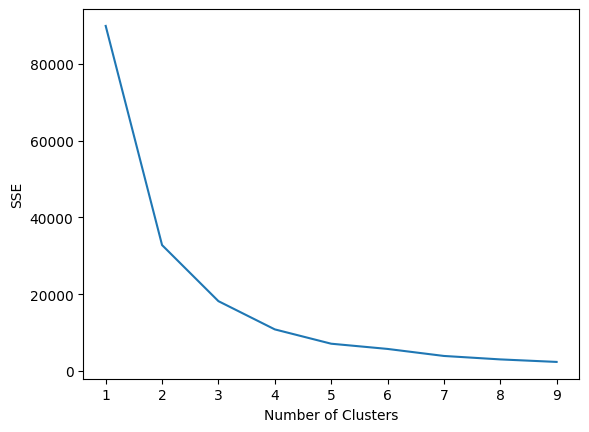

In [12]:
k_range = range(1,10)
sse = []
for k in k_range:
  km_cluster = KMeans(n_clusters=k, init='k-means++', random_state=42)
  km_cluster.fit(X)
  sse.append(km_cluster.inertia_)


plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_range,sse)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_predicted = kmeans.fit_predict(X)
y_predicted

array([2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,

In [14]:
X['Cluster'] = y_predicted
X

,Indeks Pembangunan Literasi Masyarakat,Rasio Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan yang dibina sesuai SNP,Keterlibatan Masyarakat dalam Kegiatan Sosialisasi Perpustakaan,Jumlah Anggota Perpustakaan,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan,Cluster
0,55.22,0.3162,0.0401,0.9518,1.0,1.0,0.2976,0.2595,2
1,66.77,1.0000,0.0791,0.8167,1.0,1.0,0.4060,0.3721,2
2,50.96,0.2738,0.3094,0.4060,1.0,1.0,0.3124,0.2654,0
3,62.67,1.0000,0.0129,1.0000,1.0,1.0,0.1440,0.2303,2
4,45.29,0.0173,0.0216,0.9270,1.0,1.0,0.1626,0.0416,0
...,...,...,...,...,...,...,...,...,...
483,61.50,0.1506,0.1045,1.0000,1.0,1.0,0.5409,0.5087,2
484,61.79,0.4720,0.0538,1.0000,1.0,1.0,0.2412,0.5583,2
485,63.28,0.5119,0.0480,1.0000,1.0,1.0,0.4466,0.4229,2
486,69.01,0.6775,0.0545,1.0000,1.0,1.0,0.6062,0.4928,2


In [15]:
centroids = kmeans.cluster_centers_

In [16]:
print("Jumlah Iterasi:", kmeans.n_iter_)

Jumlah Iterasi: 6


In [17]:
centroids

array([[4.65780240e+01, 1.76927545e-01, 6.13305389e-02, 7.02453293e-01,
        8.37408383e-01, 9.36162874e-01, 3.32152695e-01, 2.14055090e-01],
       [8.03413265e+01, 8.44531633e-01, 5.20294898e-01, 9.58525510e-01,
        9.72221429e-01, 1.00000000e+00, 6.80316327e-01, 6.48002041e-01],
       [6.22021525e+01, 5.35190135e-01, 1.39786099e-01, 8.96053363e-01,
        9.59725561e-01, 9.95382960e-01, 5.01992825e-01, 3.26020179e-01]])

/tmp/ipython-input-1371798971.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


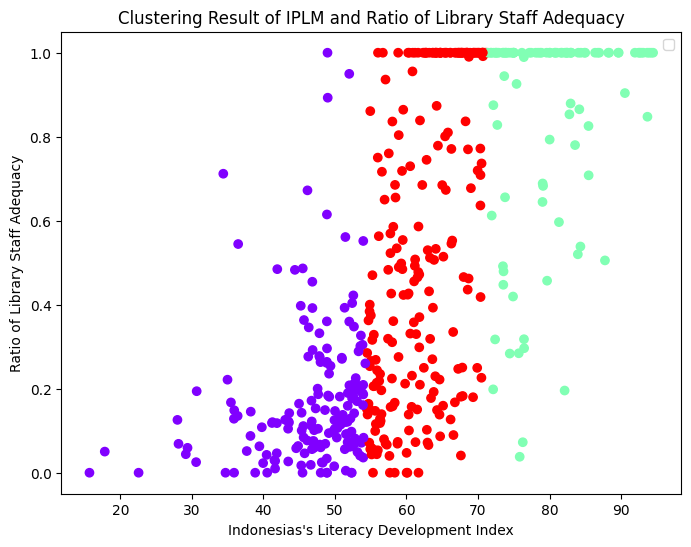

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Ratio of Library Staff Adequacy')
plt.title('Clustering Result of IPLM and Ratio of Library Staff Adequacy')
plt.legend()
plt.show()

/tmp/ipython-input-1571355829.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


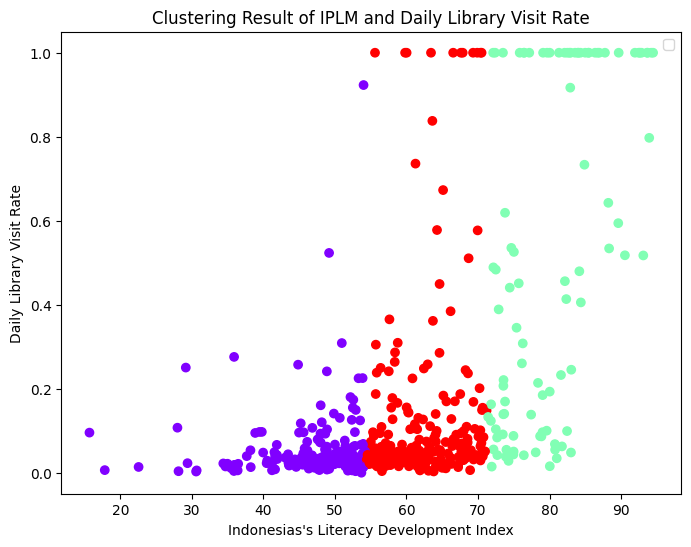

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,2],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Daily Library Visit Rate')
plt.title('Clustering Result of IPLM and Daily Library Visit Rate')
plt.legend()
plt.show()

/tmp/ipython-input-3041073490.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


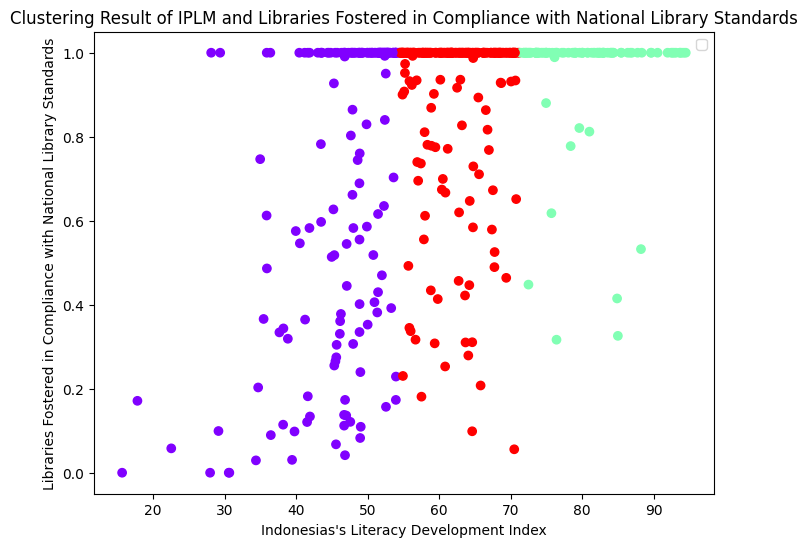

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,3],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Libraries Fostered in Compliance with National Library Standards')
plt.title('Clustering Result of IPLM and Libraries Fostered in Compliance with National Library Standards')
plt.legend()
plt.show()

/tmp/ipython-input-661210194.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


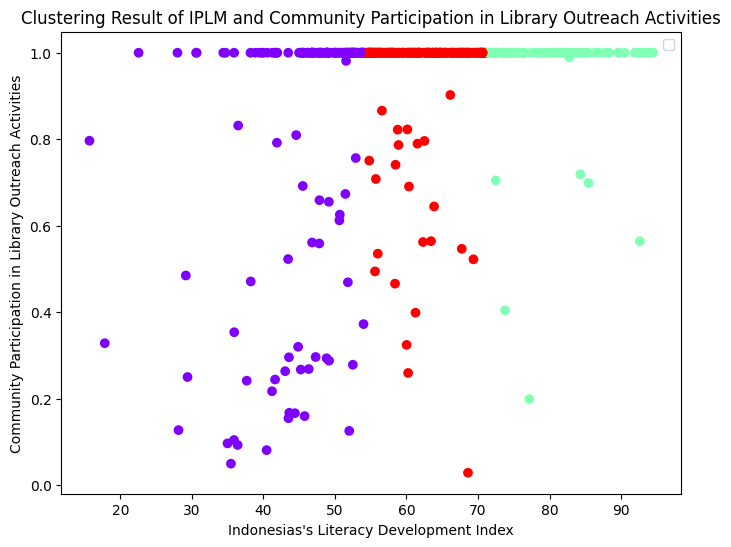

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,4],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Community Participation in Library Outreach Activities')
plt.title('Clustering Result of IPLM and Community Participation in Library Outreach Activities')
plt.legend()
plt.show()

/tmp/ipython-input-2626275720.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


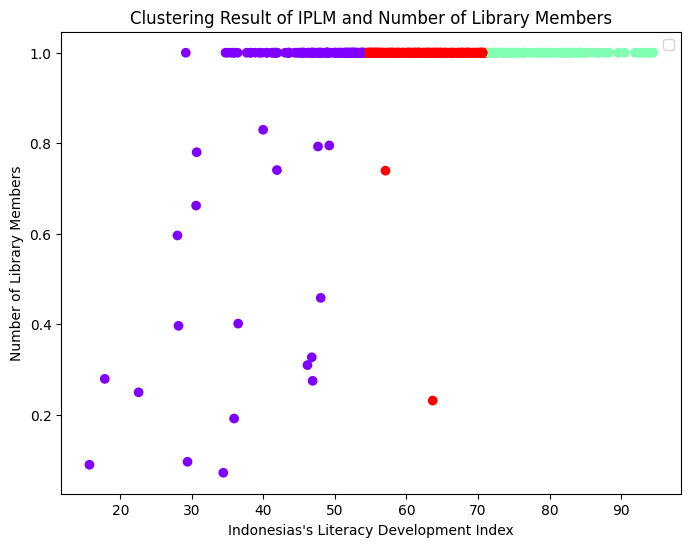

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,5],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Number of Library Members')
plt.title('Clustering Result of IPLM and Number of Library Members')
plt.legend()
plt.show()

/tmp/ipython-input-3834318043.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


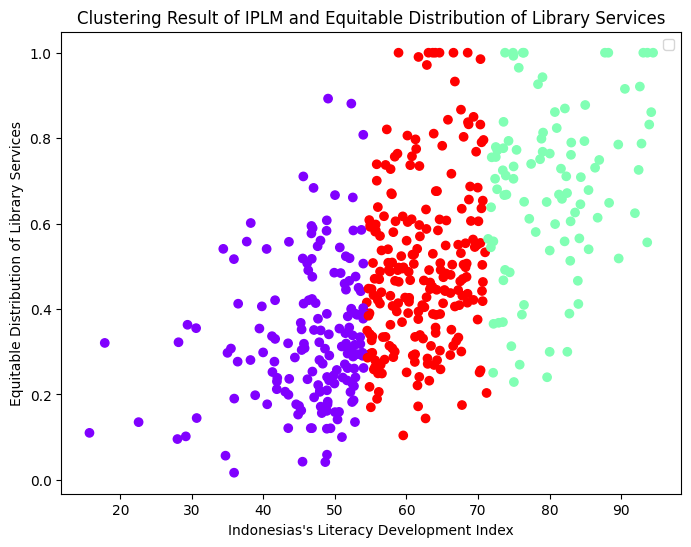

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,6],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Equitable Distribution of Library Services')
plt.title('Clustering Result of IPLM and Equitable Distribution of Library Services')
plt.legend()
plt.show()

/tmp/ipython-input-2354518024.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


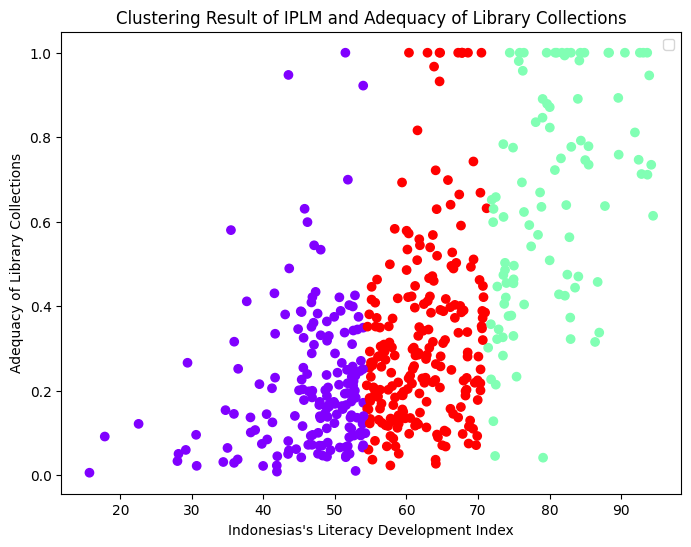

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,7],c=y_predicted,cmap='rainbow')
plt.xlabel("Indonesias's Literacy Development Index")
plt.ylabel('Adequacy of Library Collections')
plt.title('Clustering Result of IPLM and Adequacy of Library Collections')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X,y_predicted)
print(f"Davies-Bouldin Index: {dbi}")

Davies-Bouldin Index: 0.5872533221090279


In [19]:
silhouette_avg = silhouette_score(X,y_predicted)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5154763093780561
